# 3.7 k近傍法：怠惰学習アルゴリズム
- トレーニングデータセットから識別関数を学習せず、トレーニングデータセットを暗記する
- KNNアルゴリズムは以下のステップにまとめられる。
①kの値と距離指標を選択する。
②分類したいサンプルからk個の最近傍のデータ点を見つけ出す。
③多数決によりクラスラベルを割り当てる

- KNNアルゴリズムは、選択された距離指標に基づき、トレーニングデータセットのサンプルの中から分類したいデータ点に最も近いk個のサンプルを見つけ出す。
- 新しいデータ点のクラスラベルは、k個の最近傍での多数決によって決まる。

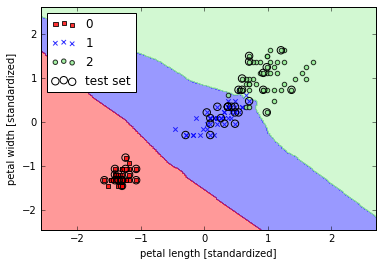

In [6]:
#トレーニングデータとテストデータの特徴量を行方向に結合
X_combined_std = np.vstack((X_train_std,X_test_std))
#トレーニングデータとテストデータのクラスラベルを結合
y_combined = np.hstack((y_train,y_test))

from sklearn.neighbors import KNeighborsClassifier
#k近傍法のインスタンスを生成
knn = KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')
#k近傍法のモデルにトレーニングデータを適合させる
knn.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=knn,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

- kを正しく選択するには、過学習と学習不足のバランスをうまく取ることが肝心である。
- データセットの特徴量に適した距離指標を選択することも重要となる。
- 多くの場合、ジッスチのサンプルには単純なユーグリッド距離が使用される。
- 上のコードでminkowski距離は、ユーグリッド距離とマンハッタン距離を一般化したもの。

$$d(\vec{x}^{(i)} , \vec{x}^{(j)}) = \sqrt[p]{\sum_{k} \| x_{k}^{(i)} - x_{k}^{(j)} \|^{p}}$$

- p=2がユーグリッド距離、p=1がマンハッタン距離である

In [3]:
from sklearn import datasets
import numpy as np
#Irisデータをロード
iris = datasets.load_iris()
#特徴量を抽出
X = iris.data[:,[2,3]]
#クラスラベルを取得
y = iris.target

from sklearn.cross_validation import train_test_split
# トレーニングデータに分割する。
# 全体の30%をテストデータにする
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#トレーニングデータの平均と標準偏差を計算
sc.fit(X_train)
#平均と標準偏差を用いて計算
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [2]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline
def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):
    
    #マーカーとカラーマップの準備
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','grey','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))]) #yの種類分色を用意する
    
    #決定領域のプロット
    x1_min, x1_max = X[:,0].min() - 1,X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1,X[:,1].max() + 1
    
    #グリッドポイントの生成
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                         np.arange(x2_min,x2_max,resolution))
    #各特徴量を１次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    #予測値結果を元のグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    #　グリッドポイントの等高線のプロット
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    #　軸の設定
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    #クラスごとにサンプルプロット
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl,0],y=X[y == cl,1],alpha=0.8,c=cmap(idx),marker=markers[idx],label=cl)
        
    #テストサンプルを目立たせる（点を○で表示）
    if test_idx:
        X_test,y_test = X[test_idx,:],y[test_idx]
        plt.scatter(X_test[:,0],X_test[:,1],c='',
                   alpha=1.0,linewidths=1,marker='o',
                   s=55,label='test set')